In [2]:
from graphviz import Source
from networkx.drawing.nx_agraph import to_agraph
from networkx.readwrite.gpickle import read_gpickle
import networkx as nx

In [3]:
def recursive_newick(tree, node, count):
    successors = list(tree.successors(node))
    if len(successors) == 0:
        cell_id = node
        return f'{cell_id}:{count}'
    elif len(successors) == 1:
        count += 1
        return recursive_newick(tree, successors[0], count)
    else:
        children = []
        for child in successors:
            child_repr = recursive_newick(tree, child, 1)
            children.append(child_repr)
        return '(' + ','.join(children) + f'):{count}'
             

In [20]:
tree_filename = f'../../../mt-SCITE/mt-SCITE_output/Simulations/ground_truth/tree9_map0.gv'

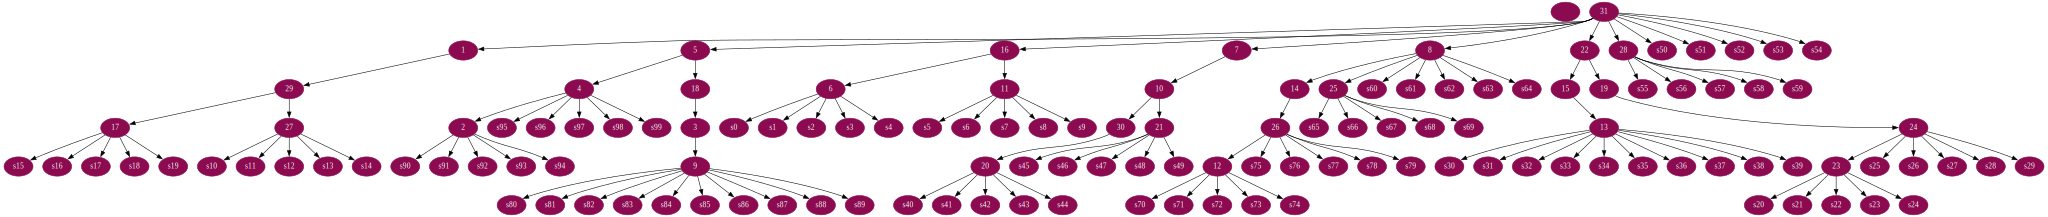

In [21]:
tree = nx.drawing.nx_pydot.read_dot(tree_filename)

from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
g = to_agraph(tree)

g = to_agraph(tree)
display(Source(g))

In [22]:
# recursive_newick(tree, 'x', 1) where x = root node 
newick_tree = '(' + recursive_newick(tree, '31', 1) + ');'

In [40]:
newick_filename = '../../../mt-SCITE/mt-SCITE_output/Simulations/ground_truth/tree7_map0_from_gv.newick'
with open(newick_filename, 'w') as f:
    f.write(newick_tree)

In [23]:
newick_tree

'((((s15:1,s16:1,s17:1,s18:1,s19:1):1,(s10:1,s11:1,s12:1,s13:1,s14:1):1):2,(((s90:1,s91:1,s92:1,s93:1,s94:1):1,s95:1,s96:1,s97:1,s98:1,s99:1):1,(s80:1,s81:1,s82:1,s83:1,s84:1,s85:1,s86:1,s87:1,s88:1,s89:1):3):1,((s45:1,s46:1,s47:1,s48:1,s49:1):1,(s40:1,s41:1,s42:1,s43:1,s44:1):2):2,(((s70:1,s71:1,s72:1,s73:1,s74:1):1,s75:1,s76:1,s77:1,s78:1,s79:1):2,(s65:1,s66:1,s67:1,s68:1,s69:1):1,s60:1,s61:1,s62:1,s63:1,s64:1):1,((s0:1,s1:1,s2:1,s3:1,s4:1):1,(s5:1,s6:1,s7:1,s8:1,s9:1):1):1,((s30:1,s31:1,s32:1,s33:1,s34:1,s35:1,s36:1,s37:1,s38:1,s39:1):2,((s20:1,s21:1,s22:1,s23:1,s24:1):1,s25:1,s26:1,s27:1,s28:1,s29:1):2):1,(s55:1,s56:1,s57:1,s58:1,s59:1):1,s50:1,s51:1,s52:1,s53:1,s54:1):1);'